# KIVA CAPSTONE PROJECT - DATA CLEANING

These are the cleaning steps I went through to make this dataset suitable for modelling.
*** 

In [1]:
#IMPORTS
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#LOAD THE DATASET
loans = pd.read_csv('/Users/nicolas/Downloads/loans.csv')

In [3]:
#LOWER THE COLUMNS
lower_columns = []
for i in loans.columns:
    lower_columns.append(i.lower())
loans.columns = lower_columns

## REMOVING NULLS

In [4]:
loans.isnull().sum()

loan_id                                  0
loan_name                            50198
original_language                    45851
description                          45886
description_translated              455272
funded_amount                            0
loan_amount                              0
status                                   0
image_id                             45851
video_id                           2052882
activity_name                            0
sector_name                              0
loan_use                             45874
country_code                            34
country_name                             0
town_name                           175530
currency_policy                          0
currency_exchange_coverage_rate     457872
currency                                 0
partner_id                           20931
posted_time                              0
planned_expiration_time             371834
disburse_time                         3970
raised_time

### DESCRIPTIONS

First of all, I dealt with the many nulls under the description_translated column. As you can see here, most of the nulls in this column are due to the fact that the translation is already made in the description column. Only some small amounts of loans, like this one in index 269, has a description with a language other then English. Hence, I replaced most of the nulls in the description translated column by the values in the description column.

Note. I tried translating the values like the description at index 269 using a google translate module, but the amount of data I had was too large to do this operation. 

In [5]:
loans[(loans.description_translated.isnull()) & (loans.original_language == 'Spanish')].head(5)

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,image_id,video_id,activity_name,sector_name,loan_use,country_code,country_name,town_name,currency_policy,currency_exchange_coverage_rate,currency,partner_id,posted_time,planned_expiration_time,disburse_time,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
110,19785,Maricela,Spanish,<p> Maricela is married and her husband is a c...,NaN,650.0,650.0,funded,70062.0,NaN,General Store,Retail,Grow her business,MX,Mexico,"Apodaca, N. L.",standard,NaN,USD,16.0,2007-09-27 22:09:11.000 +0000,NaN,2007-10-14 05:42:44.000 +0000,2007-09-30 05:42:44.000 +0000,9.0,14,1,1,NaN,Maricela,female,true,monthly,field_partner
269,143989,Mercedes,Spanish,Mercedes es una socia alegre y siempre dinámic...,NaN,350.0,350.0,funded,402362.0,NaN,Cloth & Dressmaking Supplies,Retail,Invertirá en la compra de prendas de vestir,PE,Peru,PUCALLPA,shared,0.2,PEN,72.0,2009-10-13 21:19:55.000 +0000,NaN,2009-09-24 07:00:00.000 +0000,2009-10-18 15:48:54.000 +0000,6.0,14,1,1,NaN,Mercedes,female,true,monthly,field_partner
416,43592,Teresa,Spanish,I need to put up a wall around my home and als...,NaN,1000.0,1000.0,funded,147067.0,NaN,Construction,Construction,To put up a wall and repair a window at my house,MX,Mexico,Acuna,standard,NaN,MXN,18.0,2008-04-02 18:19:09.000 +0000,NaN,2008-04-20 16:01:46.000 +0000,2008-04-06 16:01:46.000 +0000,14.0,25,1,1,NaN,Teresa,female,true,monthly,field_partner
647,37244,Maria Vilma,Spanish,Mrs. María Vilma O. A. is a member of the Comm...,NaN,350.0,350.0,funded,131004.0,NaN,Animal Sales,Agriculture,"Purchase of a lamb, a pig, and a few chickens.",PE,Peru,"Usquil - Otuzco, La Libertad",standard,NaN,PEN,72.0,2008-02-18 21:37:05.000 +0000,NaN,2008-03-11 05:33:57.000 +0000,2008-02-26 06:33:57.000 +0000,7.0,1,2,1,NaN,Maria Vilma,female,true,monthly,field_partner
1535,21009,Guillermo,Spanish,Guillermo is a milk producer and has a small v...,NaN,700.0,700.0,funded,74437.0,NaN,Dairy,Agriculture,to buy a dairy cow,BO,Bolivia,Palomar,standard,NaN,USD,48.0,2007-10-11 13:42:46.000 +0000,NaN,2007-10-27 23:39:24.000 +0000,2007-10-13 23:39:24.000 +0000,17.0,21,11,6,NaN,Guillermo,male,true,monthly,field_partner


In [6]:
#SUBSET 
description_nulls = loans[(loans.description_translated.isnull())]

In [7]:
#USING ILOC TO REPLACE THE NULLS WITH THE VALUES IN THE DESCRIPTION
loans.iloc[description_nulls.index,4] = description_nulls.description

I also removed the 45k rows of remaining nulls. I did this due to the consistent presence of other nulls throughout the subset, not only for description but also for name, genders and pictures. This meant I coudn't do most of my data imputations with this subset. 

Even though these are a big predictor which is obvious, as you are less likely to give your money to someone who doesn't give a name or gender or any basic information, they weren't as important to me. I want to analyse in between the lines. For example, understand which one is worst: being a woman but not putting a picture up or being a man with a picture up?  Not putting a picture or a gender is going to be the worse decision to get your loan funded, which is logical, and is not what I'm researching here. As for the use case, I didn't want to promote loans without pictures or basic informtion anyway.

In [8]:
#REMAINING NULLS
loans[loans.description_translated.isnull()]

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,image_id,video_id,activity_name,sector_name,loan_use,country_code,country_name,town_name,currency_policy,currency_exchange_coverage_rate,currency,partner_id,posted_time,planned_expiration_time,disburse_time,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
57,440362,NaN,NaN,NaN,NaN,500.0,500.0,funded,NaN,NaN,Fish Selling,Food,NaN,VN,Vietnam,NaN,shared,0.1,VND,172.0,2012-06-20 04:32:41.000 +0000,2012-07-21 15:00:55.000 +0000,2012-05-24 07:00:00.000 +0000,2012-06-21 20:34:39.000 +0000,11.0,19,2,1,NaN,NaN,NaN,NaN,monthly,field_partner
132,232107,NaN,NaN,NaN,NaN,425.0,425.0,funded,NaN,NaN,Fish Selling,Food,NaN,LR,Liberia,NaN,shared,0.2,LRD,141.0,2010-09-17 15:57:50.000 +0000,NaN,2010-09-16 07:00:00.000 +0000,2010-09-20 16:51:54.000 +0000,6.0,17,2,1,NaN,NaN,NaN,NaN,monthly,field_partner
183,433433,NaN,NaN,NaN,NaN,250.0,250.0,funded,NaN,NaN,General Store,Retail,NaN,PH,Philippines,NaN,shared,0.1,PHP,128.0,2012-06-04 03:56:35.000 +0000,2012-07-04 14:00:10.000 +0000,2012-05-28 07:00:00.000 +0000,2012-06-08 19:54:35.000 +0000,12.0,10,2,1,NaN,NaN,NaN,NaN,monthly,field_partner
199,16615,NaN,NaN,NaN,NaN,400.0,400.0,funded,NaN,NaN,Cosmetics Sales,Retail,NaN,TG,Togo,NaN,standard,NaN,USD,45.0,2007-08-21 06:26:17.000 +0000,NaN,2007-09-17 02:29:50.000 +0000,2007-09-03 02:29:50.000 +0000,15.0,8,1,1,NaN,NaN,NaN,NaN,monthly,field_partner
231,781422,NaN,NaN,NaN,NaN,350.0,350.0,funded,NaN,NaN,Transportation,Transportation,NaN,PE,Peru,NaN,shared,0.1,PEN,139.0,2014-10-10 16:14:10.000 +0000,2014-11-21 01:00:02.000 +0000,2014-09-11 07:00:00.000 +0000,2014-10-23 06:47:58.000 +0000,14.0,12,1,1,NaN,NaN,NaN,NaN,monthly,field_partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053911,238018,NaN,NaN,NaN,NaN,725.0,725.0,funded,NaN,NaN,Food Production/Sales,Food,NaN,PE,Peru,NaN,shared,0.2,PEN,71.0,2010-10-11 17:45:18.000 +0000,NaN,2010-09-13 07:00:00.000 +0000,2010-10-17 02:22:27.000 +0000,10.0,27,1,1,NaN,NaN,NaN,NaN,monthly,field_partner
2053973,593025,NaN,NaN,NaN,NaN,500.0,500.0,funded,NaN,NaN,Agriculture,Agriculture,NaN,ZM,Zambia,NaN,standard,NaN,ZMW,281.0,2013-08-07 13:06:18.000 +0000,2013-09-07 21:00:04.000 +0000,2013-07-30 07:00:00.000 +0000,2013-08-09 04:15:57.000 +0000,8.0,19,4,2,NaN,NaN,NaN,NaN,irregular,field_partner
2053978,598557,NaN,NaN,NaN,NaN,475.0,475.0,funded,NaN,NaN,Fish Selling,Food,NaN,SS,South Sudan,NaN,shared,0.1,SSP,206.0,2013-08-21 14:59:29.000 +0000,2013-10-01 14:30:01.000 +0000,2013-08-14 07:00:00.000 +0000,2013-09-02 15:45:49.000 +0000,8.0,17,3,2,user_favorite,NaN,NaN,NaN,monthly,field_partner
2054010,306302,NaN,NaN,NaN,NaN,2050.0,2050.0,refunded,NaN,NaN,Agriculture,Agriculture,NaN,RW,Rwanda,NaN,shared,0.2,RWF,170.0,2011-06-10 11:36:25.000 +0000,NaN,2011-06-09 07:00:00.000 +0000,2011-06-22 22:51:59.000 +0000,5.0,69,4,2,NaN,NaN,NaN,NaN,bullet,field_partner


In [9]:
#DROPPING THE ROWS WITHOUT DESCRIPTIONS
loans.drop(loans[loans.description_translated.isnull()].index,inplace=True)

In [10]:
#DROPPING THE ORIGINAL DESCRIPTION COLUMN
loans.drop(columns='description',inplace=True)

In [11]:
#RENAMING DESCRIPTION TRANSLATED AS DESCRIPTION FOR CLARITY
new_columns = {'description_translated':'description'}
loans = loans.rename(columns = new_columns)

### TOWNS

There was many nulls for the town_name column but not 0 nulls for the country_name column. I decided to replace the nulls in the town column by their respective countries, to keep the data truthful, even if countries aren't cities, but it still tells us it's a city inside that country 

In [12]:
#SUBSET 
towns_nulls = loans[loans.town_name.isnull()]

In [13]:
#CREATING LIST OF COUNTRY NAMES FOR THESE NULLS
townlist = towns_nulls.country_name

In [14]:
#USING LOC TO SET THE COUNTRIES UNDER TOWN_NAMES
loans.loc[towns_nulls.index,'town_name'] = townlist

### LOANS CURRENCY EXCHANGE COVERAGE RATE 

This is the column showing if a certain loan has a currency exchange coverage rate policy, or in other words, a compensation for currency fluctuations from the lender. I thought that the nulls arose for 2 reasons. The first is simply that there is no currency exchange policy happening, so no agreement between KIVA and a certain bank, and the second is that there is no need to do so as the currency dealt with is in dollars, so there is no currency exchange so no problem. This is why I divided the nulls into 2 groups, those that had US dollars as currency and those that didn't.

In [15]:
loans.currency_exchange_coverage_rate.value_counts()

0.1    1311448
0.2     172672
0.0      77219
Name: currency_exchange_coverage_rate, dtype: int64

In [16]:
#SUSBSET 
exchange_nulls = loans[loans.currency_exchange_coverage_rate.isnull()]

In [17]:
#CATEGORISATION OF NULLS
exchanges_list = []
for i in exchange_nulls.currency:
    if i == 'USD':
        exchanges_list.append('US_dollars')
    else:
        exchanges_list.append(0)

In [18]:
#CHANGING NULLS USING LOC
loans.loc[exchange_nulls.index,'currency_exchange_coverage_rate'] = exchanges_list

In [19]:
# NEW VALUE COUNTS 
loans.currency_exchange_coverage_rate.value_counts()

0.1           1311448
0              327068
US_dollars     196967
0.2            172672
Name: currency_exchange_coverage_rate, dtype: int64

### VIDEO

Made a simple binary column out of the video_id column and its nulls, thanks to this function.

In [20]:
#FUNCTION
def convertnull(i):
    if np.isnan(i) == True:
        return 0 
    else:
        return 1

In [21]:
#APPLY
loans['has_video'] = loans.video_id.apply(convertnull)

In [22]:
#DROP VIDEO ID COLUMN
loans.drop(columns='video_id',inplace=True)

### EXPIRATION TIME

Expiration time column had some nulls while the posted time didn't. I took the median difference between expiration time and posted time. Using the subset of expiration time nulls, I added that time to each posted_time using timedelta, appending these to a list, and modifying the nulls in the original dataframe using loc and this list. 

In [23]:
#CHANGING DTYPE
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans['planned_expiration_time'] = pd.to_datetime(loans['planned_expiration_time'])

In [24]:
#SUBSET
expiration_time_nulls = loans[loans['planned_expiration_time'].isnull()]

In [25]:
#MEDIAN TIME
(loans.planned_expiration_time - loans.posted_time).median()

Timedelta('34 days 12:53:25.500000')

In [26]:
#FOR LOOP, LIST CONSTRUCTION
dates = []
for i in expiration_time_nulls.posted_time:
    offset = timedelta(days=34,hours=12,minutes=53)
    dates.append(i + offset)

In [27]:
#CHANGING NULLS USING LOC AND LIST
loans.loc[expiration_time_nulls.index,'planned_expiration_time'] = dates

### LOAN USE AND LENDER TERM

There was some negligeable amounts of nulls in these columns which I dropped.

In [28]:
#DROP NULLS
loans.drop(loans[loans.loan_use.isnull()].index,inplace=True)

In [29]:
#DROP NULLS
loans.drop(loans[loans.lender_term.isnull()].index,inplace=True)

In [30]:
loans.isnull().sum()

loan_id                                 0
loan_name                            4346
original_language                       0
description                             0
funded_amount                           0
loan_amount                             0
status                                  0
image_id                                0
activity_name                           0
sector_name                             0
loan_use                                0
country_code                           34
country_name                            0
town_name                               0
currency_policy                         0
currency_exchange_coverage_rate         0
currency                                0
partner_id                          20394
posted_time                             0
planned_expiration_time                 0
disburse_time                        3456
raised_time                        100046
lender_term                             0
num_lenders_total                 

## REDUCING VALUE COUNTS WHILE REDUCING NULLS

### PARTNER ID

I kept the Partner ID's - or the Micro Financial Banks paired up with Kiva -  with more than 10000 loans as their own category, and those with less than 10000, to be regrouped in a same 'Medium Sized Partner' category, while those with less than 100, to be regrouped in a 'Small sized Partner' category. I put the nulls into their own category 'No Partership' as these were loans given directly to the borrower without the use of an intermediary Field Partner.

In [31]:
loans.partner_id.value_counts()

145.0    269468
156.0     58643
199.0     42945
125.0     41135
133.0     39233
          ...  
486.0         1
591.0         1
593.0         1
594.0         1
511.0         1
Name: partner_id, Length: 530, dtype: int64

In [32]:
big_guys = loans.partner_id.value_counts().head(49).index
small_guys = loans.partner_id.value_counts().tail(339).index

In [33]:
#FUNCTION
def partners(l):
    if l in big_guys:
        return l #10000 or more : OWN CATEGORY
    if l in loans.partner_id.value_counts().head(191).index:
        return('Medium sized partner') # > 10000
    if l in small_guys:
        return('Small sized partner')# > 100
    elif np.isnan(l) == True:
        return('No Partnership') # no need of Field Partners

In [34]:
#APPLY
loans['field_partners'] = loans.partner_id.apply(partners);

In [35]:
#DROP ORIGINAL PARTNER ID COLUMN
loans.drop(columns='partner_id',inplace=True)

In [36]:
#NEW VALUE COUNTS
loans.field_partners.value_counts()

Medium sized partner    579105
145.0                   269468
156.0                    58643
Small sized partner      52596
199.0                    42945
125.0                    41135
133.0                    39233
123.0                    38724
177.0                    38247
58.0                     34708
100.0                    30015
119.0                    29338
63.0                     28966
137.0                    28965
311.0                    28753
126.0                    26309
138.0                    25279
163.0                    25264
15.0                     24089
202.0                    23931
247.0                    23784
164.0                    23715
81.0                     21169
167.0                    21121
136.0                    21108
71.0                     20730
No Partnership           20394
204.0                    19678
77.0                     19498
245.0                    19217
288.0                    18444
182.0                    18396
65.0    

In [37]:
loans.isnull().sum()

loan_id                                 0
loan_name                            4346
original_language                       0
description                             0
funded_amount                           0
loan_amount                             0
status                                  0
image_id                                0
activity_name                           0
sector_name                             0
loan_use                                0
country_code                           34
country_name                            0
town_name                               0
currency_policy                         0
currency_exchange_coverage_rate         0
currency                                0
posted_time                             0
planned_expiration_time                 0
disburse_time                        3456
raised_time                        100046
lender_term                             0
num_lenders_total                       0
num_journal_entries               

# REDUCING VALUE COUNTS AND FEATURE ENGINEERING

### NUMBER OF BORROWERS

The borrower_genders column looked like this, giving the precise amount of individuals per group, so I created a new column number_of_borrowers out of it. 

In [38]:
loans.borrower_genders.value_counts()

female                                                                                                                                                                                                                                      1316439
male                                                                                                                                                                                                                                         416394
female, female, female                                                                                                                                                                                                                        27976
female, female                                                                                                                                                                                                                                27858
female, female, female, 

In [39]:
#LAMBDA FUNCTION
loans['number_of_borrowers'] = loans.borrower_genders.apply(lambda x: len(x.split()))

In [40]:
#NEW COLUMN
loans.number_of_borrowers.value_counts().head(10)

1     1732885
3       38233
2       36724
5       34617
4       32228
10      15692
8       14249
6       13779
7       11661
9       10459
Name: number_of_borrowers, dtype: int64

### BORROWER GENDERS

Looking like that, I knew that I needed to reduce the value counts of borrower_genders. So I thought to be appropriate to have a resulting column with 6 values: male, female, low percentage of group with males, high percentages of group with males, groups of males, groups of females. 

To do this I wrote a function counting the number of males per value in the column and created a new feature num_of_males out of it. Then I created another feature by dividing num_of_males by num_of_borrowers to have the percentage of males per group.

In [41]:
loans.borrower_genders.value_counts()

female                                                                                                                                                                                                                                      1316439
male                                                                                                                                                                                                                                         416394
female, female, female                                                                                                                                                                                                                        27976
female, female                                                                                                                                                                                                                                27858
female, female, female, 

In [42]:
#FUNCTION
def genders(l):
    k = 0
    for i in l.split(','):
        if i == ' male' or i == 'male':
            k += 1
    return k 
      

In [43]:
genders('male, male, female, female')

2

In [44]:
#APPLY
#NEW COLUMN
loans['num_of_males'] = loans.borrower_genders.apply(genders)

In [45]:
loans.num_of_males.value_counts().head(15)

0     1477870
1      456119
2       22857
3       15483
4       10514
5        7856
6        5364
7        3775
8        2646
9        1704
10       1236
11        767
12        506
13        404
14        277
Name: num_of_males, dtype: int64

In [46]:
#NEW COLUMN
loans['percentage_of_males'] = loans.num_of_males / loans.number_of_borrowers

In [47]:
loans.percentage_of_males.value_counts()

0.000000    1477870
1.000000     424615
0.500000      13026
0.333333       9798
0.250000       8923
             ...   
0.369565          1
0.896552          1
0.617647          1
0.771429          1
0.108108          1
Name: percentage_of_males, Length: 479, dtype: int64

Looking at the percentage of males column, the loans with 0.000 are loans taken by a female or group of females, the loans 1.0000 are loans taken by a man or group of mans, and the loans with values ranging from 0 to 1 are loans taken by a mixed group. 

I created a custom function accordingly to return a column with males, famale, and 2 groups of groups: low percentage and high percentage of groups with males, by taking the mean of the values between 0 and 1.

In [48]:
#MEAN OF VALUES
loans[(loans.percentage_of_males > 0.000001) & (loans.percentage_of_males < 0.999999)].percentage_of_males.mean()

0.35517323258764366

In [49]:
#CUSTOM FUNCTION
def male_percentage(l):
    if l == 0.000000:
        return 'female'
    elif 0.00001 < l < 0.35517323258764366:
        return 'low percentage of male group'
    elif 0.35517323258764366 < l < 0.99999999:
        return 'high percentage of male group'
    else:
        return 'male'


In [50]:
#APPLY
loans['gender_categories'] = loans.percentage_of_males.apply(male_percentage)

In [51]:
loans.gender_categories.value_counts()

female                           1477870
male                              424615
low percentage of male group       60243
high percentage of male group      45392
Name: gender_categories, dtype: int64

The female value takes into account females and groups of females, the male value takes into account males and groups of males. I create 2 other categories by using subsets and using loc on the main dataset.

In [52]:
#SUBSET
males = loans[loans.gender_categories == 'male']      

In [53]:
#LOC
loans.loc[males[males.number_of_borrowers > 1].index,'gender_categories'] = 'group_of_males'

In [54]:
#SUBSET
females = loans[loans.gender_categories == 'female']

In [55]:
#LOC
loans.loc[females[females.number_of_borrowers > 1].index,'gender_categories'] = 'group_of_females'

In [56]:
#5 categories
loans.gender_categories.value_counts()

female                           1316491
male                              416394
group_of_females                  161379
low percentage of male group       60243
high percentage of male group      45392
group_of_males                      8221
Name: gender_categories, dtype: int64

In [57]:
loans.drop(columns=['num_of_males','percentage_of_males','borrower_genders'],inplace=True)

I drop the 3 columns that I used to create this final feature as they are redundant or useless.

### TOWNS

Too many values, once again cut down using a cutom function.

In [58]:
loans.town_name.value_counts()

El Salvador                                           37175
Kaduna                                                18446
CUSCO                                                 16591
Rwanda                                                16314
Lahore                                                14449
                                                      ...  
Hartsdale                                                 1
Top Center ,Mafeteng, Ha Rannakwe                         1
Sarali                                                    1
Boeng Veng Village, Kraing Leav Commune,Rolea Pe E        1
La Torre North, Bayombong, Nueva Vizcaya                  1
Name: town_name, Length: 28491, dtype: int64

In [59]:
#FUNCTION
bigtowns = list(loans.town_name.value_counts().head(300).index)
def towns(i):
    if i in bigtowns:
        return i
    else:
        return 'Village'
loans['town_name'] = loans.town_name.apply(towns)

In [60]:
loans.town_name.value_counts()

Village                          920775
El Salvador                       37175
Kaduna                            18446
CUSCO                             16591
Rwanda                            16314
                                  ...  
PONTEVEDRA, NEGROS OCCIDENTAL      1538
Nadia                              1531
Huaycan                            1528
Kilifi                             1525
Kabul Afghanistan                  1516
Name: town_name, Length: 301, dtype: int64

### BORROWER PICTURED

After looking at these value counts, I decided I wanted four categories out of this : single pictures, groups whose members are all pictured, groups which have more members pictured, and groups which had less members pictured.

I did that first with a custom function dividing the number of "falses", or a person not pictured, with the number of people in the group. 

In [61]:
loans.borrower_pictured.value_counts()

true                                                                                                                                                                                                                                      1732885
true, true, true                                                                                                                                                                                                                            38233
true, true                                                                                                                                                                                                                                  36724
true, true, true, true, true                                                                                                                                                                                                                34617
true, true, true, true          

In [62]:
#FUNCTION
def pictures(l):
    k = 0
    if (len(l.split()) == 1) & (l == 'true'):
        return 0
    for i in l.split(','):
        if i == ' false' or i == 'false':
            k += 1 
    return k / len(l.split())
      

In [63]:
pictures('false, true, true')

0.3333333333333333

In [64]:
#APPLY
loans.borrower_pictured = loans.borrower_pictured.apply(pictures)

In [65]:
loans.borrower_pictured.value_counts()

0.000000    1972533
0.166667       2948
0.142857       2696
0.125000       2661
0.100000       2462
             ...   
0.152174          1
0.222222          1
0.163265          1
0.155556          1
0.102041          1
Name: borrower_pictured, Length: 135, dtype: int64

I used the same methods as I did with borrower_genders to split this into four categories.

I first created a custom function using the mean of the values between 0 and 1 to divide the groups into groups with less people pictured and groups with more people pictured.

I also knew that a 0.00000 value meant its or a single picture or a group were everyone is pictured, so I made sure to make the distinction, using subsets and loc.


In [66]:
loans[(loans.borrower_pictured > 0.000001) & (loans.borrower_pictured < 0.999999)].borrower_pictured.mean()

0.1174378490387843

In [67]:
#FUNCTION
def pics_percentage(l):
    if l == 0.000000:
        return 'single pic'
    elif 0.00001 < l < 0.11743800516925956:
        return 'group with most pics'
    elif 0.11743800516925956 < l < 0.99999999:
        return 'groups with less pics'

In [68]:
#APPLY
loans['borrower_pictured'] = loans.borrower_pictured.apply(pics_percentage)

In [69]:
loans.borrower_pictured.value_counts()

single pic               1972533
group with most pics       17919
groups with less pics      17668
Name: borrower_pictured, dtype: int64

In [70]:
#SUBSET
sgwithpic = loans[loans.borrower_pictured == 'single pic']

In [71]:
#LOC
loans.loc[sgwithpic[sgwithpic.number_of_borrowers > 1].index,'borrower_pictured'] = 'group with all pics'

In [72]:
# 4 categories
loans.borrower_pictured.value_counts()

single pic               1732885
group with all pics       239648
group with most pics       17919
groups with less pics      17668
Name: borrower_pictured, dtype: int64

### DAYS OF CAMPAIGN DURATION

I also realised I could feature engineer a column displaying the number of days a certain loan was on campaign. I did that by taking the difference between the expired time and posted time. Then I took specfically the days using datetime.

In [73]:
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans['planned_expiration_time'] = pd.to_datetime(loans['planned_expiration_time'])
#NEW COLUMN
loans['campaign_duration'] = loans.planned_expiration_time - loans.posted_time

In [74]:
loans.campaign_duration.value_counts()

34 days 12:53:00    357113
30 days 00:09:31        25
30 days 00:09:41        24
30 days 00:05:00        24
30 days 00:05:35        23
                     ...  
63 days 09:27:51         1
36 days 05:04:21         1
37 days 16:29:22         1
34 days 06:54:34         1
42 days 15:46:22         1
Name: campaign_duration, Length: 951767, dtype: int64

In [75]:
#DATETIME
loans['days_of_campaign_duration'] = loans.campaign_duration.dt.days

In [76]:
loans.drop(columns = 'campaign_duration', inplace=True)

In [77]:
loans.days_of_campaign_duration.value_counts()

34      511439
30      215123
32      179168
33      172569
31      167273
         ...  
1464         1
1474         1
1480         1
462          1
1029         1
Name: days_of_campaign_duration, Length: 732, dtype: int64

##  THE TARGET VARIABLE - STATUS

In [78]:
loans.status.value_counts(normalize=True)

funded         0.950178
expired        0.045821
fundRaising    0.004000
Name: status, dtype: float64

I dropped the loans still fundraising as we still can't learn from these recent loans, leaving this a binary classification problem. 

In [79]:
loans.drop(loans[loans.status == 'fundRaising'].index,inplace=True)

In [80]:
loans.status.value_counts(normalize=True)

funded     0.953995
expired    0.046005
Name: status, dtype: float64

Since I will first do some Exploratory Data Analysis, I will set the 'funded' majority class as the positive value to display percentages funded. However, once I've finished with my EDA, I will set the minority 'expired' class as positive for the modelling.

In [81]:
loans['status'] = loans.status.map(lambda x: 0 if 'expired' in x else 1)

In [82]:
loans.status.value_counts(normalize=True)

1    0.953995
0    0.046005
Name: status, dtype: float64

## REMOVING USELESS COLUMNS

In [83]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000087 entries, 0 to 2054040
Data columns (total 35 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   loan_id                          int64              
 1   loan_name                        object             
 2   original_language                object             
 3   description                      object             
 4   funded_amount                    float64            
 5   loan_amount                      float64            
 6   status                           int64              
 7   image_id                         float64            
 8   activity_name                    object             
 9   sector_name                      object             
 10  loan_use                         object             
 11  country_code                     object             
 12  country_name                     object             
 13  town_name   

In [84]:
loans['disburse_time'] = pd.to_datetime(loans['disburse_time'])
loans['disburse_status'] = loans.disburse_time

In [85]:
before_posting = loans[loans.posted_time > loans.disburse_time]
loans.loc[loans[loans.posted_time < loans.disburse_time].index,'disburse_status'] = 'disbursal_after_posting'
loans.loc[before_posting[(before_posting.posted_time - before_posting.disburse_time) >= '16 days 20:31:16'].index,'disburse_status'] = 'disbursal_16_days_or_more_before_posting'
loans.loc[before_posting[(before_posting.posted_time - before_posting.disburse_time) < '16 days 20:31:16'].index,'disburse_status'] = 'disbursal_16_days_or_less_before_posting'
loans.loc[loans[loans.disburse_time.isnull()].index,'disburse_status'] = 'no_disbursal'

In [86]:
loans.disburse_status.value_counts()

disbursal_16_days_or_less_before_posting    920066
disbursal_16_days_or_more_before_posting    917613
disbursal_after_posting                     159010
no_disbursal                                  3398
Name: disburse_status, dtype: int64

- I remove disburse_time, a column which says at what time the borrower received a loan from the Micro-Financial Institution (as there can be pre-disbursal), as it doesn't add much to the analysis and has 1 variable that is highly correlated with the loans that are expired. As you can see , after cleaning I have four categories, indicting whether there was pre-disbursal of the loan by the Micro Financial Institution or not ( meaning the borrowers would have gotten the loan anyway or not). 
- First of all, the 3000 values in the category no disbursal are highly correlated with the positive class, or a loan being expired, which is a giveaway. I would have needed to remove those rows, but since they were from the precious minority class I felt bad doing that.
- The two categories of pre-disbursal are the ones most correlated with the positive class but have pretty much the same funding rates. Post disbursal loans get a bit more funded since they are dependent on Kiva, which would have been nice to add to my analysis, but this is by only 2 percenatage points compared to the others, which isn't huge.
- Since the variation in funded rates between the different categories isn't huge, and the fact I would have needed to remove some rows for this be added, I resolved keeping this out of the analysis. These values might be redundant with other information as well, for example field partners or distribution model.

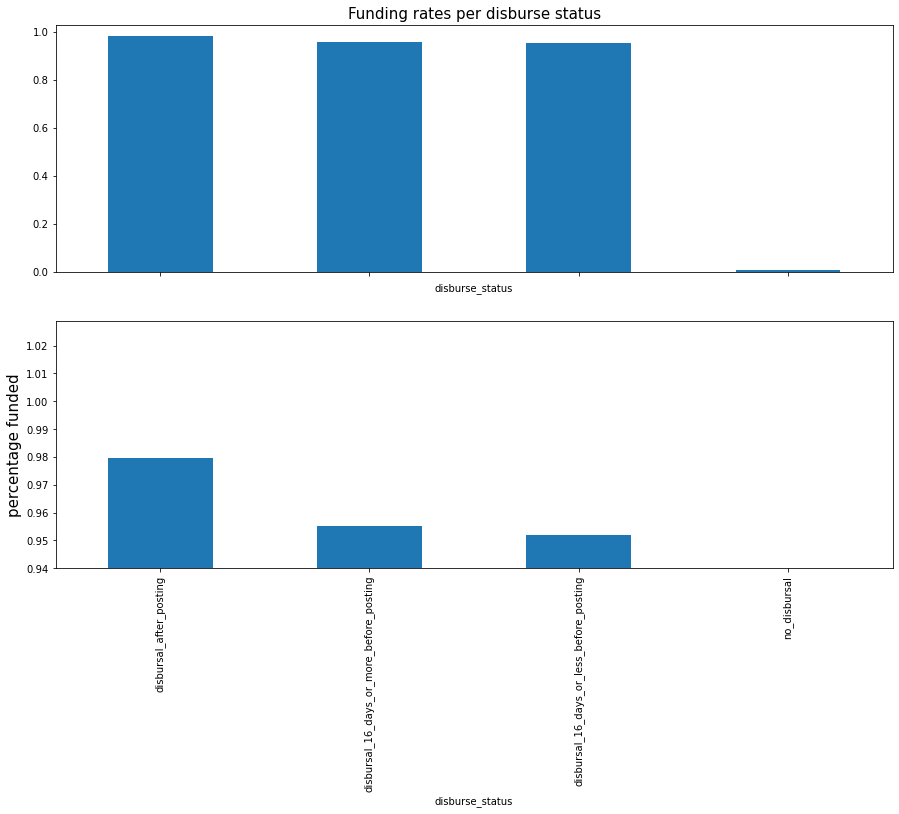

In [88]:
fig,(ax,ax1) = plt.subplots(nrows=2,figsize=(10,10))
loans.groupby('disburse_status')['status'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(15,10),ax=ax)
loans.groupby('disburse_status')['status'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(15,10),ax=ax1)
ax1.set_ylabel('percentage funded',fontsize=15)
ax1.set_ylim(0.94)
ax.set_xticklabels(labels= '')
ax.set_title('Funding rates per disburse status',fontsize=15)
plt.show()

In [89]:
loans[loans.disburse_status == 'disbursal_16_days_or_less_before_posting'].status.value_counts()

1    875866
0     44200
Name: status, dtype: int64

* I remove loan_id, image_id, loan_name and borrower_names as these columns don't add much to the analysis
- I remove country_code due to its redudancy with country_name

In [90]:
loans.drop(columns=['loan_id','image_id','loan_name', 'borrower_names','country_code','disburse_time','disburse_status'],inplace=True)

## REMOVING GIVEAWAY AND POST CAMPAIGN COLUMNS

In [91]:
loans.isnull().sum()

original_language                       0
description                             0
funded_amount                           0
loan_amount                             0
status                                  0
activity_name                           0
sector_name                             0
loan_use                                0
country_name                            0
town_name                               0
currency_policy                         0
currency_exchange_coverage_rate         0
currency                                0
posted_time                             0
planned_expiration_time                 0
raised_time                         92013
lender_term                             0
num_lenders_total                       0
num_journal_entries                     0
num_bulk_entries                        0
tags                               896923
borrower_pictured                       0
repayment_interval                      0
distribution_model                

- The funded_amount column is a giveaway and is data that Kiva gets once the campaign finishes, while we want the data available at the start of the campaign. Same for raised_time, which is post-campaign data, and a clear giveaway, as the 100k nulls above mean that money the was never raised druing fundraising, so there was never a disbursal, meaning these nulls are highly correlated with a loan being expired or not. 
- Num_lenders_total, or the data about the number of people who help out per loan, is also post-campaign data, while this model focuses on the information available at the time the loan is posted on the website 

In [92]:
loans.drop(columns=['num_lenders_total','raised_time','funded_amount'],inplace=True)

### NUM JOURNAL ENTRIES AND NUM BULK ENTRIES

In [93]:
loans.num_journal_entries.value_counts().head(15)

1     1308769
2      506774
3       91422
4       56532
5       16552
6       11215
7        3357
8        1791
10        795
9         619
12        413
11        367
19        307
14        249
16        187
Name: num_journal_entries, dtype: int64

In [94]:
jel = [1,2,3,4,5,6]
def journalentries(i):
    if i in jel:
        return i
    else:
        return ('7 or more')

In [95]:
loans['num_journal_entries'] = loans.num_journal_entries.apply(journalentries)

To finish, there was also these 2 columns, num_journal_entries and num_bulk_entries, whose meaning I had trouble understanding. However, while doing some EDA, I notcied that the vast majority of loans had 1 journal entry, but in the rare case that your loan has more than one, it is nearly guaranteed to be funded. This is shown in the second graph in which >1 loan entry columns have nearly 100 % funded rates. This severe dichotomy results in a giveaway as only 1 category is correlated with the positive class (1 journal entry), resulting most-likely in post-campaign data. The same goes for num_bulk_entries. Due to their likeliness in being post-campaign data, I removed these.

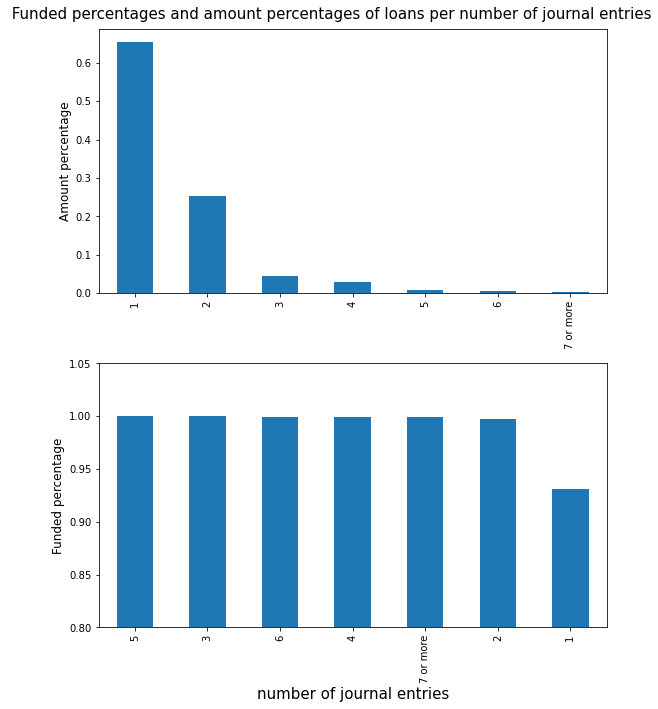

In [96]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(8,10))
loans.num_journal_entries.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('num_journal_entries')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle(' Funded percentages and amount percentages of loans per number of journal entries',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=12)
ax1.set_ylabel('Funded percentage',fontsize=12)
ax1.set_xlabel('number of journal entries',fontsize=15)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

In [97]:
loans.num_bulk_entries.value_counts().head(5)

1    1792428
2     160930
3      34269
4       8273
5       1771
Name: num_bulk_entries, dtype: int64

In [98]:
bel = [1,2]
def bulkentries(i):
    if i in bel:
        return i
    else:
        return ('3 or more')

In [99]:
loans['num_bulk_entries'] = loans.num_bulk_entries.apply(bulkentries)

In [100]:
loans.num_bulk_entries.value_counts()

1            1792428
2             160930
3 or more      46729
Name: num_bulk_entries, dtype: int64

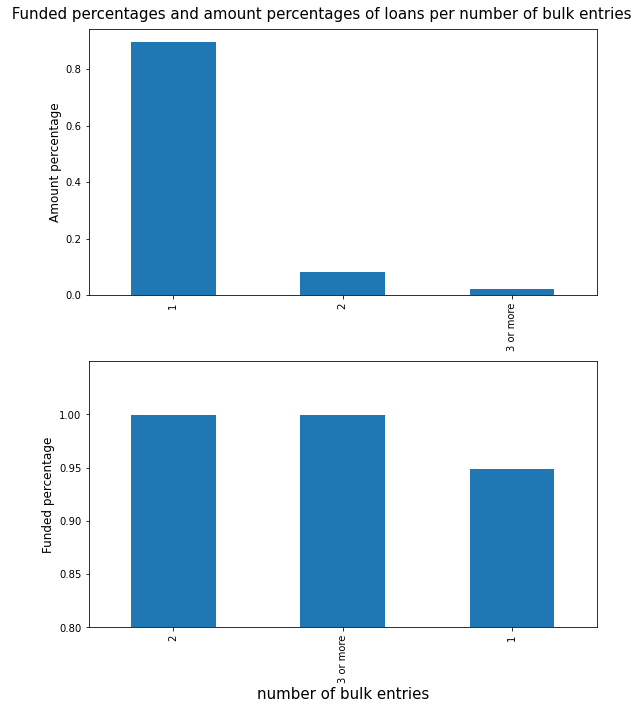

In [101]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(8,10))
loans.num_bulk_entries.value_counts(normalize=True).plot(kind='bar',ax=ax)
loans.groupby('num_bulk_entries')['status'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
fig.suptitle(' Funded percentages and amount percentages of loans per number of bulk entries',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=12)
ax1.set_ylabel('Funded percentage',fontsize=12)
ax1.set_xlabel('number of bulk entries',fontsize=15)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

In [102]:
#DROP
loans.drop(columns=['num_journal_entries','num_bulk_entries'],inplace=True)

In [103]:
#EDA READY
loans.to_csv('loans_data_cleaned.csv')